In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

In [26]:
# Import data
data = pd.read_csv("Groceries_dataset.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [8]:
# Describe data
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [29]:
# Cleaning data
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [24]:
data['Member_number'].nunique()

3898

In [30]:
data['date'] = data['Date'].dt.date
data['month'] = data['Date'].dt.month
data['month'] = data['month'].replace(
    (1,2,3,4,5,6,7,8,9,10,11,12), 
    ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
)

data['weekday'] = data['Date'].dt.weekday
data['weekday'] = data['weekday'].replace(
    (0,1,2,3,4,5,6),
    ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
)

data.drop('Date', axis=1, inplace=True)

data

,Member_number,itemDescription,date,month,weekday
0,1808,tropical fruit,2015-07-21,July,Tuesday
1,2552,whole milk,2015-05-01,May,Friday
2,2300,pip fruit,2015-09-19,September,Saturday
3,1187,other vegetables,2015-12-12,December,Saturday
4,3037,whole milk,2015-01-02,January,Friday
...,...,...,...,...,...
38760,4471,sliced cheese,2014-08-10,August,Sunday
38761,2022,candy,2014-02-23,February,Sunday
38762,1097,cake bar,2014-04-16,April,Wednesday
38763,1510,fruit/vegetable juice,2014-03-12,March,Wednesday


In [34]:
data['itemDescription'] = data['itemDescription'].str.strip()
data['itemDescription'] = data['itemDescription'].str.lower()
data.head()

,Member_number,itemDescription,date,month,weekday
0,1808,tropical fruit,2015-07-21,July,Tuesday
1,2552,whole milk,2015-05-01,May,Friday
2,2300,pip fruit,2015-09-19,September,Saturday
3,1187,other vegetables,2015-12-12,December,Saturday
4,3037,whole milk,2015-01-02,January,Friday


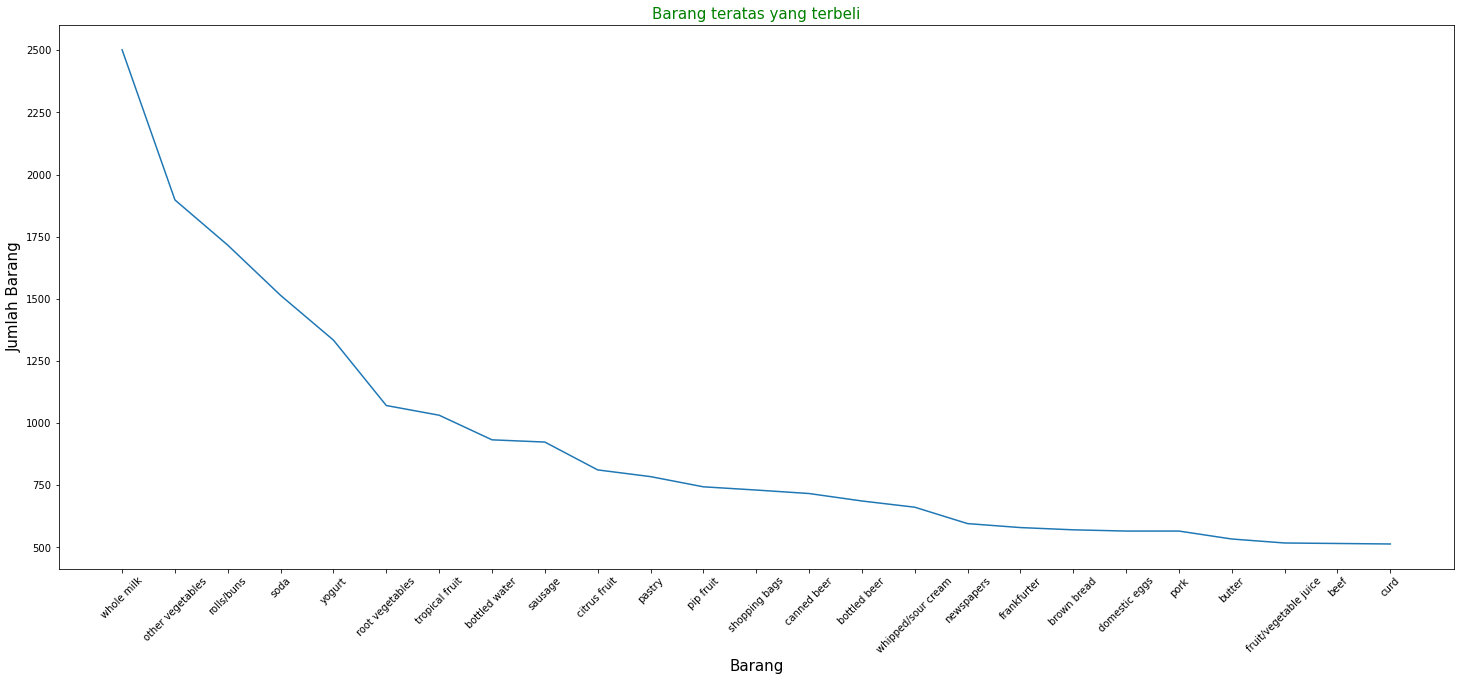

In [37]:
# Data analysis
plt.figure(figsize=(25,10))
sns.lineplot(x = data.itemDescription.value_counts().head(25).index, y = data.itemDescription.value_counts().head(25).values)
plt.xlabel('Barang', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Jumlah Barang', size = 15)
plt.title('Barang teratas yang terbeli', color = 'green', size = 15)
plt.show()

Text(0.5, 1.0, 'Barang terbeli per bulan')

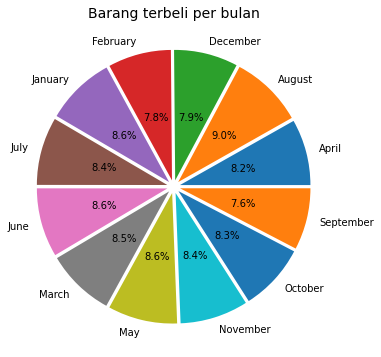

In [44]:
# Count purchased items per month
months = data.groupby('month')['Member_number'].count()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=months, autopct="%.1f%%", explode=[0.05]*12, labels=months.keys(), pctdistance=0.5)
plt.title("Barang terbeli per bulan", fontsize=14)

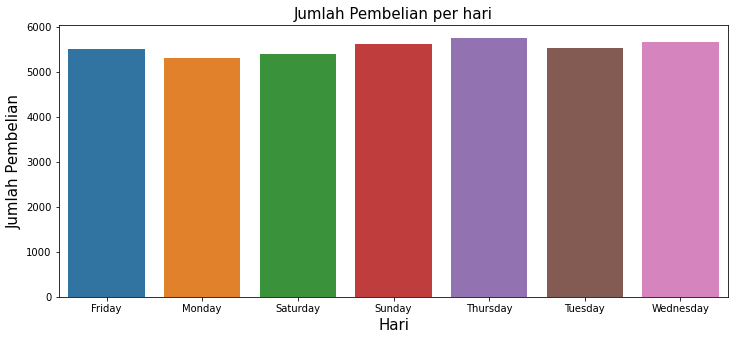

In [56]:
# Count items bought per day
days = data.groupby('weekday')['Member_number'].count()

plt.figure(figsize=(12,5))
sns.barplot(x=days.keys(), y=days)
plt.xlabel('Hari', size=15)
plt.ylabel('Jumlah Pembelian', size=15)
plt.title('Jumlah Pembelian per hari', size = 15)
plt.show()

In [59]:
# Apriori Algorithm
data['itemDescription'] = data.groupby(['Member_number', 'date'])['itemDescription'].transform(lambda x: ','.join(x))
data

,Member_number,itemDescription,date,month,weekday
0,1808,"tropical fruit,rolls/buns,candy,tropical fruit...",2015-07-21,July,Tuesday
1,2552,"whole milk,tropical fruit,chocolate,whole milk...",2015-05-01,May,Friday
2,2300,"pip fruit,other vegetables,flour,pip fruit,oth...",2015-09-19,September,Saturday
3,1187,"other vegetables,onions,shopping bags,other ve...",2015-12-12,December,Saturday
4,3037,"whole milk,other vegetables,white bread,whole ...",2015-01-02,January,Friday
...,...,...,...,...,...
38760,4471,"whole milk,yogurt,sliced cheese,whole milk,yog...",2014-08-10,August,Sunday
38761,2022,"cat food,yogurt,candy,cat food,yogurt,candy,ca...",2014-02-23,February,Sunday
38762,1097,"sausage,whole milk,cake bar,sausage,whole milk...",2014-04-16,April,Wednesday
38763,1510,"beef,canned beer,fruit/vegetable juice,beef,ca...",2014-03-12,March,Wednesday


In [63]:
lst = []
for i in range(0, len(data)-1):
    d = data['itemDescription'][i].split(',')
    lst.append(d)

In [66]:
te = TransactionEncoder()
te_arr = te.fit(lst).transform(lst)
data_new = pd.DataFrame(te_arr, columns=te.columns_)
data_new

,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [90]:
# Find support
freq_items = apriori(data_new, min_support=0.02, use_colnames=True)
freq_items

,support,itemsets
0,0.039624,(beef)
1,0.024739,(berries)
2,0.054742,(bottled beer)
3,0.069497,(bottled water)
4,0.044165,(brown bread)
5,0.041895,(butter)
6,0.020586,(butter milk)
7,0.055954,(canned beer)
8,0.033072,(chicken)
9,0.028093,(chocolate)


In [91]:
# Create rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(rolls/buns),(whole milk),0.127954,0.183753,0.022237,0.173790,0.945782,-0.001275,0.987942
0,(other vegetables),(whole milk),0.137679,0.183753,0.022340,0.162263,0.883052,-0.002959,0.974348
1,(whole milk),(other vegetables),0.183753,0.137679,0.022340,0.121578,0.883052,-0.002959,0.981670
2,(whole milk),(rolls/buns),0.183753,0.127954,0.022237,0.121016,0.945782,-0.001275,0.992108
